In [1]:
import mph
import numpy as np

In [2]:
client = mph.start()

cell = client.load("models/cell.mph")

In [3]:
para_dict = cell.parameters()
para = np.array([para_dict["r"], para_dict["rr"], para_dict["p"]])

In [4]:
cell.parameter("rr", 0.0001)

In [5]:
cell.mesh()
cell.solve("Study 1")

In [6]:
cell.exports()

['res']

In [8]:
text = cell.export("res")

In [1]:
import matplotlib.pyplot as plt

# Read the data from the file
with open("Untitled.txt", "r") as file:
    lines = file.readlines()

In [8]:
xy_values = [
    list(map(float, ",".join(line.split()).split(",")))
    for line in lines
    if not line.startswith("%")
]

In [12]:
arr = np.array(xy_values)

In [13]:
arr_sorted = arr[arr[:, 0].argsort()]  # 按照x值对arr进行排序

min_values = {}  # 初始化一个空的字典来存储每个x值的最小的两个数

for x, y in arr_sorted:
    if x not in min_values:
        min_values[x] = [y]
    else:
        if len(min_values[x]) < 2:
            min_values[x].append(y)
        else:
            max_value = max(min_values[x])
            if y < max_value:
                min_values[x].remove(max_value)
                min_values[x].append(y)

print(min_values)

{0.0: [104.25621188421196, 14096168373.158693], 0.047320508075688765: [14064086924.03612, 551331124.6276202], 0.09464101615137753: [1101629043.132032, 13974224607.059294], 0.1419615242270663: [13840414379.797998, 1649848044.6494844], 0.18928203230275506: [2194916148.0235085, 13675909457.288843], 0.23660254037844383: [2735718598.9784927, 13490407787.686188], 0.2839230484541326: [3271076685.759633, 13290517175.295265], 0.33124355652982135: [3799719090.7357965, 13080880397.422058], 0.3785640646055101: [4320241600.205176, 12865045683.689552], 0.4258845726811989: [4831048711.06401, 12646034675.553139], 0.47320508075688766: [5330266972.270013, 12426724669.555952], 0.5205255888325764: [5815614012.475318, 12210149471.509945], 0.5678460969082652: [11999797191.143879, 6284198312.657741], 0.6151666049839539: [6732213208.867749, 11799971026.063265], 0.6624871130596427: [7154480650.25793, 11616273087.497833], 0.7098076211353315: [11456239428.585436, 7543824013.412641], 0.7571281292110202: [78903946

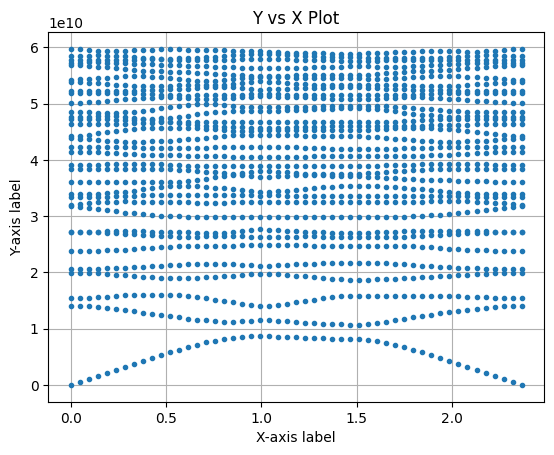

In [9]:
# Extract the numerical data


x_data, y_data = zip(*xy_values)

# Plot the data
plt.plot(x_data, y_data, marker=".", linestyle="")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Y vs X Plot")
plt.grid(True)

plt.show()